In [1]:
# Import relevant modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import re

### Ice 1990 

In [2]:
# File string
file = 'HadISST1_ICE_1961-1990.txt'

# Open ice coverage file (1961-1990)
with open(file) as f:
    data = f.readlines()

In [5]:
# Find line in data where 1990 data starts
data[62988]

'     1     1  1990   180 rows    360 columns\n'

In [6]:
### Loop over file lines to extract data ###
# Starting line
start_val = 62989
# Loop over file lines (equivalent to latitudes)
# This line selection includes the time details of following months data,
# but this is excluded in the inner loop
for r in range(start_val,len(data),181):
    
    # Print range of lines that will be retireved (includes time details line)
    print(f'{r} to {r+180}', end=' --> ')
    
    # Only loop over lines that have data
    for i in range(r,r+180,1):
        # If at starting value, get array values (from strings), add a dimension for concatenation,
        # and remove values introduced by the mask, and set up 2D array to hold data
        if i == r:
            data_grid = np.asarray([float(x) for x in re.split('-|   ', data[i].strip()) if x!=''])
            data_grid = np.expand_dims(data_grid,axis=0)
            data_grid[data_grid>32700] = np.nan
            
        # Else get array values (from strings), add a dimension for concatenation,
        # and remove values introduced by the mask, and append to 2D array
        else:
            dr = np.asarray([float(x) for x in re.split('-|   ', data[i].strip()) if x!=''])
            dr = np.expand_dims(dr,axis=0)
            dr[dr>32700] = np.nan
            data_grid = np.concatenate((data_grid,dr),axis=0)
    
    # Once full month is aquired create/append values to 3D array
    if r == start_val:
        ice_stack = data_grid
    else:
        ice_stack = np.dstack((ice_stack,data_grid))
    
    # Print month complete message and array shape
    print(f'complete - {ice_stack.shape}')

# Print all complete message and final array shape
print(f'########\nAll Data Complete, final shape: {ice_stack.shape}\n########')

62989 to 63169 --> complete - (180, 360)
63170 to 63350 --> complete - (180, 360, 2)
63351 to 63531 --> complete - (180, 360, 3)
63532 to 63712 --> complete - (180, 360, 4)
63713 to 63893 --> complete - (180, 360, 5)
63894 to 64074 --> complete - (180, 360, 6)
64075 to 64255 --> complete - (180, 360, 7)
64256 to 64436 --> complete - (180, 360, 8)
64437 to 64617 --> complete - (180, 360, 9)
64618 to 64798 --> complete - (180, 360, 10)
64799 to 64979 --> complete - (180, 360, 11)
64980 to 65160 --> complete - (180, 360, 12)
########
All Data Complete, final shape: (180, 360, 12)
########


### Add ice 1991-2003

In [7]:
# File string
file = 'HadISST1_ICE_1991-2003.txt'
# Open ice coverage file (1991-2003)
with open(file) as f:
    data = f.readlines()

In [9]:
# Copy first ice stack data
ice_stack2 = ice_stack.copy()

In [10]:
data[0]

'     1     1  1991   180 rows    360 columns\n'

In [11]:
### Loop over file lines to extract data ###
# Starting line
start_val = 1
# Loop over file lines (equivalent to latitudes)
# This line selection includes the time details of following months data,
# but this is excluded in the inner loop
for r in range(start_val,len(data),181):
    
    # Print range of lines that will be retireved (includes time details line)
    print(f'{r} to {r+180}', end=' --> ')
    
    # Only loop over lines that have data
    for i in range(r,r+180,1):
        # If at starting value, get array values (from strings), add a dimension for concatenation,
        # and remove values introduced by the mask, and set up 2D array to hold data
        if i == r:
            data_grid = np.asarray([float(x) for x in re.split('-|   ', data[i].strip()) if x!=''])
            data_grid = np.expand_dims(data_grid,axis=0)
            data_grid[data_grid>32700] = np.nan
            
        # Else get array values (from strings), add a dimension for concatenation,
        # and remove values introduced by the mask, and append to 2D array
        else:
            dr = np.asarray([float(x) for x in re.split('-|   ', data[i].strip()) if x!=''])
            dr = np.expand_dims(dr,axis=0)
            dr[dr>32700] = np.nan
            data_grid = np.concatenate((data_grid,dr),axis=0)
            
    # Once full month is aquired create/append values to 3D array
    ice_stack2 = np.dstack((ice_stack2,data_grid))
    # Print month complete message and array shape
    print(f'complete - {ice_stack2.shape}')
    
# Print all complete message and final array shape 
print(f'########\nAll Data Complete, final shape: {ice_stack2.shape}\n########')

1 to 181 --> complete - (180, 360, 13)
182 to 362 --> complete - (180, 360, 14)
363 to 543 --> complete - (180, 360, 15)
544 to 724 --> complete - (180, 360, 16)
725 to 905 --> complete - (180, 360, 17)
906 to 1086 --> complete - (180, 360, 18)
1087 to 1267 --> complete - (180, 360, 19)
1268 to 1448 --> complete - (180, 360, 20)
1449 to 1629 --> complete - (180, 360, 21)
1630 to 1810 --> complete - (180, 360, 22)
1811 to 1991 --> complete - (180, 360, 23)
1992 to 2172 --> complete - (180, 360, 24)
2173 to 2353 --> complete - (180, 360, 25)
2354 to 2534 --> complete - (180, 360, 26)
2535 to 2715 --> complete - (180, 360, 27)
2716 to 2896 --> complete - (180, 360, 28)
2897 to 3077 --> complete - (180, 360, 29)
3078 to 3258 --> complete - (180, 360, 30)
3259 to 3439 --> complete - (180, 360, 31)
3440 to 3620 --> complete - (180, 360, 32)
3621 to 3801 --> complete - (180, 360, 33)
3802 to 3982 --> complete - (180, 360, 34)
3983 to 4163 --> complete - (180, 360, 35)
4164 to 4344 --> complet

### Add ice 2004-2021

In [12]:
# Copy previous ice data
ice_final = ice_stack2.copy()

In [13]:
# Loop over years for which there are seperate yearly files
for yr in range(2004,2022):
    # File string
    file = f'HadISST1_ICE_{yr}.txt'
    # Open ice coverage file
    with open(file) as f:
        data = f.readlines()
    
    #Loop over file lines to extract data
    # Starting line
    start_val = 1
    
    # Loop over file lines (equivalent to latitudes)
    # This line selection includes the time details of following months data,
    # but this is excluded in the inner loop
    for r in range(start_val,len(data),181):
        
        # Print range of lines that will be retireved (includes time details line)
        print(f'({yr}) - {r} to {r+180}', end=' --> ')
        
        # Only loop over lines that have data
        for i in range(r,r+180,1):
            # If at starting value, get array values (from strings), add a dimension for concatenation,
            # and remove values introduced by the mask, and set up 2D array to hold data
            if i == r:
                data_grid = np.asarray([float(x) for x in re.split('-|   ', data[i].strip()) if x!=''])
                data_grid = np.expand_dims(data_grid,axis=0)
                data_grid[data_grid>32700] = np.nan
                
            # Else get array values (from strings), add a dimension for concatenation,
            # and remove values introduced by the mask, and append to 2D array  
            else:
                dr = np.asarray([float(x) for x in re.split('-|   ', data[i].strip()) if x!=''])
                dr = np.expand_dims(dr,axis=0)
                dr[dr>32700] = np.nan
                data_grid = np.concatenate((data_grid,dr),axis=0)
                
        # Once full month is aquired create/append values to 3D array
        ice_final = np.dstack((ice_final,data_grid))
        # Print month complete message and array shape
        print(f'complete - {ice_final.shape}')

# Print all complete message and final array shape 
print(f'########\nAll Data Complete, final shape: {ice_final.shape}\n########')

(2004) - 1 to 181 --> complete - (180, 360, 169)
(2004) - 182 to 362 --> complete - (180, 360, 170)
(2004) - 363 to 543 --> complete - (180, 360, 171)
(2004) - 544 to 724 --> complete - (180, 360, 172)
(2004) - 725 to 905 --> complete - (180, 360, 173)
(2004) - 906 to 1086 --> complete - (180, 360, 174)
(2004) - 1087 to 1267 --> complete - (180, 360, 175)
(2004) - 1268 to 1448 --> complete - (180, 360, 176)
(2004) - 1449 to 1629 --> complete - (180, 360, 177)
(2004) - 1630 to 1810 --> complete - (180, 360, 178)
(2004) - 1811 to 1991 --> complete - (180, 360, 179)
(2004) - 1992 to 2172 --> complete - (180, 360, 180)
(2005) - 1 to 181 --> complete - (180, 360, 181)
(2005) - 182 to 362 --> complete - (180, 360, 182)
(2005) - 363 to 543 --> complete - (180, 360, 183)
(2005) - 544 to 724 --> complete - (180, 360, 184)
(2005) - 725 to 905 --> complete - (180, 360, 185)
(2005) - 906 to 1086 --> complete - (180, 360, 186)
(2005) - 1087 to 1267 --> complete - (180, 360, 187)
(2005) - 1268 to 14

(2017) - 544 to 724 --> complete - (180, 360, 328)
(2017) - 725 to 905 --> complete - (180, 360, 329)
(2017) - 906 to 1086 --> complete - (180, 360, 330)
(2017) - 1087 to 1267 --> complete - (180, 360, 331)
(2017) - 1268 to 1448 --> complete - (180, 360, 332)
(2017) - 1449 to 1629 --> complete - (180, 360, 333)
(2017) - 1630 to 1810 --> complete - (180, 360, 334)
(2017) - 1811 to 1991 --> complete - (180, 360, 335)
(2017) - 1992 to 2172 --> complete - (180, 360, 336)
(2018) - 1 to 181 --> complete - (180, 360, 337)
(2018) - 182 to 362 --> complete - (180, 360, 338)
(2018) - 363 to 543 --> complete - (180, 360, 339)
(2018) - 544 to 724 --> complete - (180, 360, 340)
(2018) - 725 to 905 --> complete - (180, 360, 341)
(2018) - 906 to 1086 --> complete - (180, 360, 342)
(2018) - 1087 to 1267 --> complete - (180, 360, 343)
(2018) - 1268 to 1448 --> complete - (180, 360, 344)
(2018) - 1449 to 1629 --> complete - (180, 360, 345)
(2018) - 1630 to 1810 --> complete - (180, 360, 346)
(2018) - 18

<AxesSubplot:>

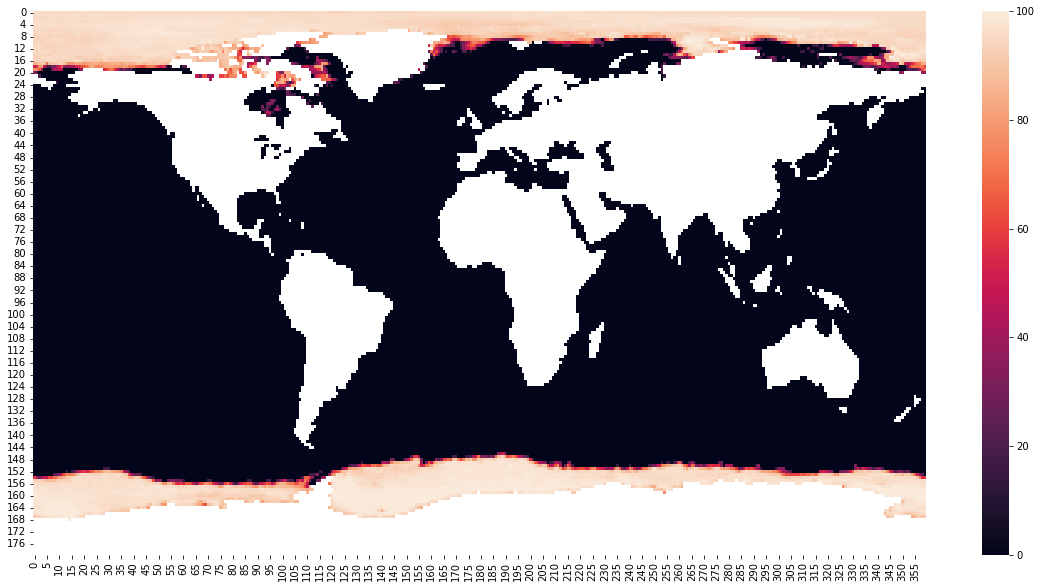

In [19]:
# Plot select ice coverage data
plt.figure(figsize=(20,10))
sns.heatmap(ice_final[:,:,378])

In [20]:
# Flatten data for saving
for d in range(0, ice_final.shape[2]):
    if d == 0:
        ice_flat = ice_final[:,:,d]
    else:
        ice_slice = ice_final[:,:,d]
        ice_flat = np.concatenate((ice_flat,ice_slice),axis=0)

# Print shape as check
print(ice_flat.shape)

(69120, 360)


In [21]:
# Save data
np.savetxt('ice_LR_flat.csv', ice_flat, delimiter=',')